# Lista 07 - Comparando Classificadores

# Exercício 01:

Analise o desempenho do kNN e de uma Regressão Logística Regularizada para **pelo menos um** dos conjuntos de dados abaixo:

* [Avaliação de carros](http://archive.ics.uci.edu/ml/datasets/Car+Evaluation)
* [Avaliação de vinhos](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)
* [Resultados de partidas do jogo Dota](http://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results) (desafiador!)

Para a questão, faça as seguintes tarefas:

* Realize treino, validação e teste
* Compare as métricas no teste
* Reporte a precisão, revocação, F1 e a matriz de confusão

Como já estamos no fim da matéria, você pode agora fazer uso da biblioteca scikit-learn. Afinal, no dia a dia, não implementamos tudo do zero. Abaixo temos os imports que vocês precisam. Leiam a API da biblioteca para saber como fazer uso da mesma.

In [1]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from sklearn.neighbors import KNeighborsClassifier

# Um fator importante é que o SKLearn não cria conjuntos de validação para você. Você tem algumas abordagens,
# uma é realizar um novo split no treino. Outra é fazer uso de classificadores com CV no fim.
# Tipo LogisticRegressionCV (ver na API). Por fim, você pode fazer uso da classe GridSearchCV.
# Leia a documentação da mesma.
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4
plt.ion()
plt.style.use('seaborn-colorblind')

def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

## Logistic Regression

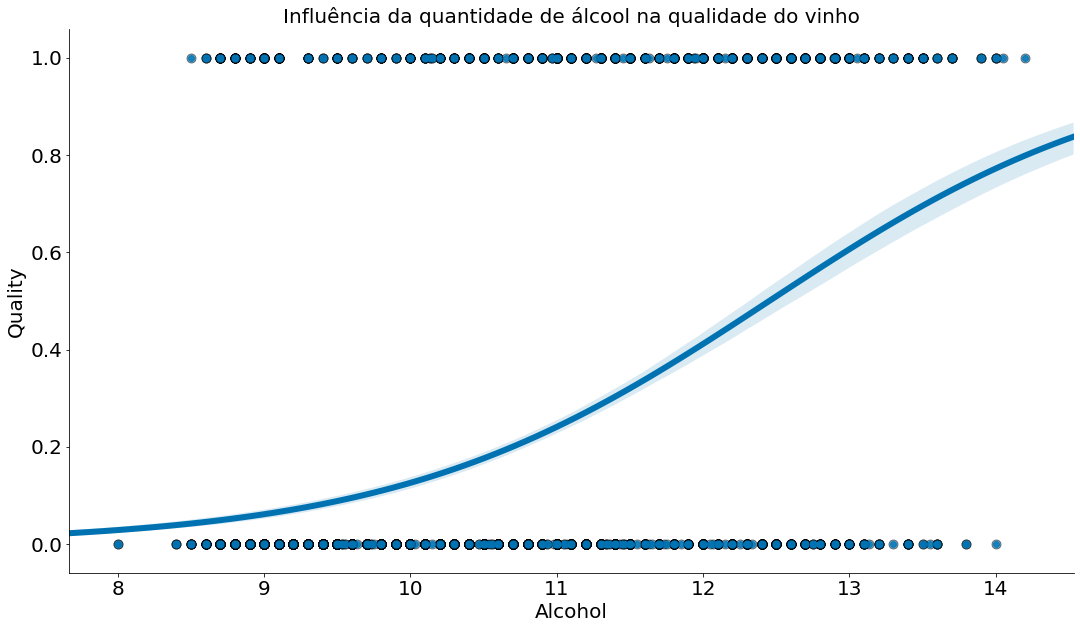

In [3]:
plt.rcParams['figure.figsize']  = (18, 10)

wine = pd.read_csv('./winequality-white.csv', sep=';')
wine['alcohol'] = wine['alcohol']
wine['quality'] = np.where(wine['quality'] <= 6, 0, wine['quality'])
wine['quality'] = np.where(wine['quality'] > 6, 1, wine['quality'])

plt.scatter(wine['alcohol'], wine['quality'], s=80, alpha=0.5, edgecolors='k')
sns.regplot(x='alcohol', y='quality', data=wine, logistic=True)
plt.title('Influência da quantidade de álcool na qualidade do vinho')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
despine()
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(wine['alcohol'], wine['quality'], test_size=0.33, random_state=42)
X = []
for i in wine['alcohol']:
    X += [[i]]
y = wine['quality']
clf = LogisticRegressionCV(cv=5, random_state=0, multi_class='multinomial').fit(X, y)

tn, tp, p0, p1 = 0, 0, 0, 0
num_correct = 0
for index, line in wine.iterrows():
    predict = clf.predict([[line['alcohol']]])
    if predict == 0:
        p0 += 1
    else:
        p1 += 1
    if predict == line['quality']:
        if predict == 0:
            tn += 1
        else:
            tp += 1
        num_correct += 1
n = 4898
fp = p1-tp
fn = p0-tn

print("Score (Acurácia) =", clf.score(X, y), " = ", (tp+tn)/n)
print("Taxa de Erros =", (fp+fn)/n)
print("Precisão =", tp/(tp+fp))
print("Revocação =", tp/(tp+fn))

Score (Acurácia) = 0.7982850142915475  =  0.7982850142915475
Taxa de Erros = 0.20171498570845242
Precisão = 0.5821917808219178
Revocação = 0.24056603773584906


## KNN

In [5]:
neigh = KNeighborsClassifier(n_neighbors=3)
x = []
for i in wine['alcohol']:
    x += [[i]]
neigh.fit(x, np.array(wine['quality']))

for k in [1, 3, 5, 7, 9, 11]:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x, np.array(wine['quality']))
    num_correct = 0
    for index, line in wine.iterrows():
        predict = neigh.predict([[line['alcohol']]])
        if predict == line['quality']:
            num_correct += 1
    print(k, "neighbor[s]:", num_correct, "correct out of", len(wine))

1 neighbor[s]: 3565 correct out of 4898
3 neighbor[s]: 3785 correct out of 4898
5 neighbor[s]: 3886 correct out of 4898
7 neighbor[s]: 3912 correct out of 4898
9 neighbor[s]: 3906 correct out of 4898
11 neighbor[s]: 3885 correct out of 4898


Aqui, portanto, conseguimos perceber que 7 é o melhor número para usarmos. E, por isso, nossos dados serão baseados nele:

In [6]:
tn, tp, p0, p1 = 0, 0, 0, 0
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x, np.array(wine['quality']))
num_correct = 0
for index, line in wine.iterrows():
    predict = neigh.predict([[line['alcohol']]])
    if predict == 0:
        p0 += 1
    else:
        p1 += 1
    if predict == line['quality']:
        if predict == 0:
            tn += 1
        else:
            tp += 1
        num_correct += 1
        
n = 4898
fp = p1-tp
fn = p0-tn

print("Acurácia =", (tp+tn)/n)
print("Taxa de Erros =", (fp+fn)/n)
print("Precisão =", tp/(tp+fp))
print("Revocação =", tp/(tp+fn))

Acurácia = 0.7986933442221315
Taxa de Erros = 0.20130665577786852
Precisão = 0.5589171974522293
Revocação = 0.3311320754716981


Explique e discuta sobre os resultados encontrados no campo abaixo.

### LogisticRegression
> Com essa regressão logística, conseguimos perceber que, de alguma forma, os dados se comportam de forma que, quanto mais aumentamos o nível de álcool no vinho, melhor será a qualidade desse vinho.
>
> A análise da precisão, acurácia e revocação está abaixo

### KNN
> Com os dados coletados e observados, podemos ver que nossos dados possuem acurácia consideravelmente alta, o que nos garante que estamos no caminho correto. Já quanto a precião, não temos uma precisão muito alta e temos uma taxa de erros cosideravel. Por isso, não podemos ter certeza que otimizamos o melhor modelo ainda.
>
> Conseguimos observar, também, que a acurácia, taxa de erros, precisão e revocação de ambos os métodos é bem parecida. Porém, conseguimos observar uma acurácia relativamente maior na Regressão Logística e uma Precisão relativamnete maior no KNN com K=7. Sendo assim, não temos um método que seja totalmente melhor que o outro.